### Training a simple convolutional neural network on the CIFAR-10 dataset

In [1]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-93245f43-5639-d648-713e-ceffebad884e)


In [2]:
!pip install pyyaml h5py  # Required to save models in HDF5 format

In [3]:
import os

In [4]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')


Define CIFAR-10 image dimensions which will be used later to reshape data.

In [5]:
img_rows, img_cols = 32, 32

#### Load CIFAR-10 data

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [7]:
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)
print (y_test)
print (x_test)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)
[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237

In [8]:
print (np.max(x_train))
print (np.min(x_train))

255
0


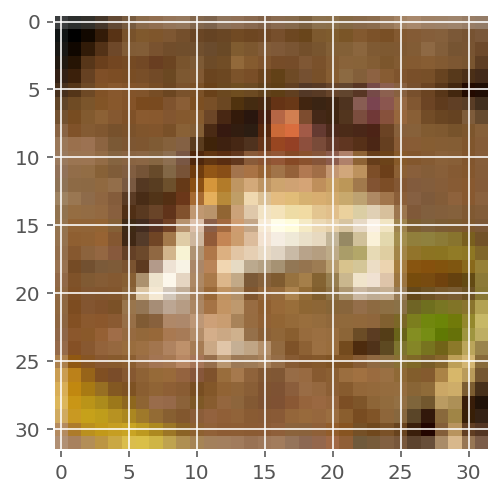

In [9]:
plt.imshow(x_train[0])
plt.show()

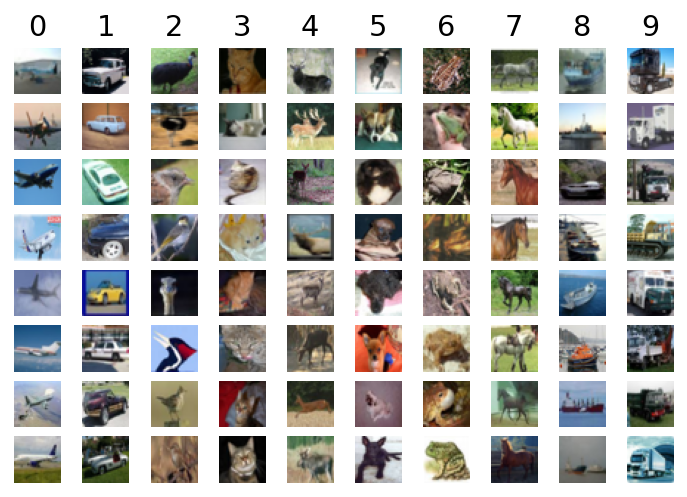

In [10]:
examples_per_class = 8 # number of examples you want to see from each class
num_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cls, cls_name in enumerate(num_classes):
  idxs = np.where(cls == y_train)
  idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
  for i, idx in enumerate(idxs):
    plt.subplot(examples_per_class, len(num_classes), i * len(num_classes) + cls + 1)
    plt.imshow(x_train[idx].astype('uint8'), cmap = 'gray')
    plt.axis('off')
    if i == 0:
      plt.title(cls_name)

#### Data preprocessing 

In [11]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)

Normalize the pixel values and convert class vectors to binary class matrices

In [12]:
num_classes = 10
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Comment out the two lines below to remove the normalization
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


#### Designing different models to be used




In [13]:
# def lenet():
#   # Lenet

#   model = tf.keras.Sequential()

#   # first set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(6, kernel_size=(5,5), 
#                           strides=(1,1),
#                           padding='valid', 
#                           input_shape=input_shape,
#                           use_bias=True, 
#                           kernel_initializer='glorot_uniform',
#                           bias_initializer='zeros'))

#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # second set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(16, kernel_size=(5,5), 
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # Start of neural network
#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(120))
#   model.add(tf.keras.layers.Activation('relu'))

#   model.add(tf.keras.layers.Dense(84))
#   model.add(tf.keras.layers.Activation('relu'))
#   # Classifier
#   model.add(tf.keras.layers.Dense(num_classes))

#   # Exercise : Complete the activation function of the classifier
#   model.add(tf.keras.layers.Activation('softmax'))
#   return model

In [14]:
# def lenetNue():
#   # Lenet

#   model = tf.keras.Sequential()

#   # first set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(12, kernel_size=(5,5), # change from 6 to 12 
#                           strides=(1,1),
#                           padding='same', # adds sufficient padding to the input so that the output has same dimension as input
#                           input_shape=input_shape,
#                           use_bias=True, 
#                           kernel_initializer='glorot_uniform',
#                           bias_initializer='zeros'))

#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # second set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), # change from 16 to 32  
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # Start of neural network
#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(240)) # change from 120 to 240
#   model.add(tf.keras.layers.Activation('relu'))

#   model.add(tf.keras.layers.Dense(168)) # change from 84 to 168
#   model.add(tf.keras.layers.Activation('relu'))
#   # Classifier
#   model.add(tf.keras.layers.Dense(num_classes))

#   # Exercise : Complete the activation function of the classifier
#   model.add(tf.keras.layers.Activation('softmax'))
#   return model

In [15]:
# def lenetNueDropOut():
#   # Lenet

#   model = tf.keras.Sequential()

#   # first set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(12, kernel_size=(5,5), # change from 6 to 12 
#                           strides=(1,1),
#                           padding='same', # adds sufficient padding to the input so that the output has same dimension as input
#                           input_shape=input_shape,
#                           use_bias=True, 
#                           kernel_initializer='glorot_uniform',
#                           bias_initializer='zeros'))

#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # second set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5), # change from 16 to 32  
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

#   # Start of neural network
#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(240)) # change from 120 to 240
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(keras.layers.Dropout(0.2)) # randomly setting 20% of the units to 0 at each update during training time to prevent overfitting.

#   model.add(tf.keras.layers.Dense(168)) # change from 84 to 168
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(keras.layers.Dropout(0.2)) # randomly setting 20% of the units to 0 at each update during training time to prevent overfitting.
  
#   # Classifier
#   model.add(tf.keras.layers.Dense(num_classes))

#   # Exercise : Complete the activation function of the classifier
#   model.add(tf.keras.layers.Activation('softmax'))
#   return model

In [16]:
# def convnet():

#   model = tf.keras.Sequential()

#   # first set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           strides=(1,1),
#                           padding='same', 
#                           input_shape=input_shape,
#                           use_bias=True, 
#                           kernel_initializer='glorot_uniform',
#                           bias_initializer='zeros'))

#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#   # second set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#   # third set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  

#   # Start of neural network
#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(32768))
#   model.add(tf.keras.layers.Activation('relu'))

#   model.add(tf.keras.layers.Dense(256))
#   model.add(tf.keras.layers.Activation('relu'))

#   model.add(tf.keras.layers.Dense(256))
#   model.add(tf.keras.layers.Activation('relu'))

#   # Classifier
#   model.add(tf.keras.layers.Dense(num_classes))

#   # Exercise : Complete the activation function of the classifier
#   model.add(tf.keras.layers.Activation('softmax'))
#   return model

In [17]:
# def convnetDropOut():

#   model = tf.keras.Sequential()

#   # first set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           strides=(1,1),
#                           padding='same', 
#                           input_shape=input_shape,
#                           use_bias=True, 
#                           kernel_initializer='glorot_uniform',
#                           bias_initializer='zeros'))

#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#   # second set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='same'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

#   # third set of CONV => RELU => POOL
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
#                           padding='valid'))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  

#   # Start of neural network
#   model.add(tf.keras.layers.Flatten())
#   model.add(tf.keras.layers.Dense(32768))
#   model.add(tf.keras.layers.Activation('relu'))
#   model.add(keras.layers.Dropout(0.5)) # randomly setting 50% of the units to 0 at each update during training time to prevent overfitting.

#   model.add(tf.keras.layers.Dense(256))
#   model.add(tf.keras.layers.Activation('relu'))

#   model.add(tf.keras.layers.Dense(256))
#   model.add(tf.keras.layers.Activation('relu'))

#   # Classifier
#   model.add(tf.keras.layers.Dense(num_classes))

#   # Exercise : Complete the activation function of the classifier
#   model.add(tf.keras.layers.Activation('softmax'))
#   return model

In [18]:
def vggFinal():

  model = tf.keras.Sequential()

  # 2-block vgg style architecture

  # first layer
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                          strides=(1,1),
                          padding='same', 
                          input_shape=input_shape,
                          use_bias=True, 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.2)) # changed from 0.2 in vggAdd1DropOut

  # second layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.3)) # changed from 0.2 in vggAdd1DropOut

  # third layer
  model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), 
                          padding='same',
                          activation='relu')) # add on to VGGBase
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.4)) # changed from 0.2 in vggAdd1DropOut

  # Start of neural network
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(4096,
                                  activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.5)) # changed from 0.2 in vggAdd1DropOut
  model.add(tf.keras.layers.Dense(4096,
                                  activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.6)) # all Dropout added to VGGAdd1 and changed from 0.2 in vggAdd1DropOut

  # Classifier
  model.add(tf.keras.layers.Dense(num_classes,
                                  activation='softmax'))
  return model

In [19]:
def vggHalf():

  model = tf.keras.Sequential()

  # 2-block vgg style architecture

  # first layer
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                          strides=(1,1),
                          padding='same', 
                          input_shape=input_shape,
                          use_bias=True, 
                          kernel_initializer='glorot_uniform',
                          bias_initializer='zeros',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.2)) # changed from 0.2 in vggAdd1DropOut

  # second layer
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.3)) # changed from 0.2 in vggAdd1DropOut

  # third layer
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                          padding='same',
                          activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), 
                          padding='same',
                          activation='relu')) # add on to VGGBase
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(keras.layers.Dropout(0.4)) # changed from 0.2 in vggAdd1DropOut

  # Start of neural network
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(2048,
                                  activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.5)) # changed from 0.2 in vggAdd1DropOut
  model.add(tf.keras.layers.Dense(2048,
                                  activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(keras.layers.Dropout(0.6)) # all Dropout added to VGGAdd1 and changed from 0.2 in vggAdd1DropOut

  # Classifier
  model.add(tf.keras.layers.Dense(num_classes,
                                  activation='softmax'))
  return model

In [20]:
model = vggHalf()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [21]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model training


Initiate the values of hyperparameters 

In [22]:
batch_size = 8
num_classes = 10
epochs = 200

In [23]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split = 0.1,
    )

datagen.fit(x_train)
# it_train = datagen.flow(trainX, trainY, batch_size=64)
traingen = datagen.flow(x_train, y_train, batch_size=16, subset='training')
validgen = datagen.flow(x_train, y_train, batch_size=16, subset='validation')
model_log = model.fit(traingen,
          steps_per_epoch=len(x_train) / 32, epochs=epochs,
          validation_data=validgen,
          # validation_steps=150
          )

Epoch 1/200
1562/1562 [==============================] - 25s 14ms/step - loss: 3.3234 - accuracy: 0.1928 - val_loss: 1.9610 - val_accuracy: 0.3426
Epoch 2/200
1562/1562 [==============================] - 21s 14ms/step - loss: 2.6018 - accuracy: 0.2769 - val_loss: 1.9084 - val_accuracy: 0.3814
Epoch 3/200
1562/1562 [==============================] - 21s 14ms/step - loss: 2.2078 - accuracy: 0.3194 - val_loss: 1.6771 - val_accuracy: 0.3942
Epoch 4/200
1562/1562 [==============================] - 22s 14ms/step - loss: 1.9415 - accuracy: 0.3657 - val_loss: 1.4602 - val_accuracy: 0.4716
Epoch 5/200
1562/1562 [==============================] - 21s 13ms/step - loss: 1.7894 - accuracy: 0.3950 - val_loss: 1.3728 - val_accuracy: 0.5120
Epoch 6/200
1562/1562 [==============================] - 21s 14ms/step - loss: 1.6453 - accuracy: 0.4301 - val_loss: 1.4157 - val_accuracy: 0.5056
Epoch 7/200
1562/1562 [==============================] - 21s 14ms/step - loss: 1.5187 - accuracy: 0.4708 - val_loss: 1

In [24]:
# model_log = model.fit(x_train, y_train,
#                       batch_size=batch_size, # number of samples to be used for each gradient update
#                       epochs=epochs, # number of iterations over the entire x_train data#                      
#                       validation_split = 0.1, #validation_data=(x_test, y_test), # on which to evaluate loss and model metrics at the end of each epoch
#                      )

In [36]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/half_batch8_model')

INFO:tensorflow:Assets written to: saved_model/half_batch8_model/assets


In [39]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('half_batch8_model.h5')

## Plotting out the accuracy and loss

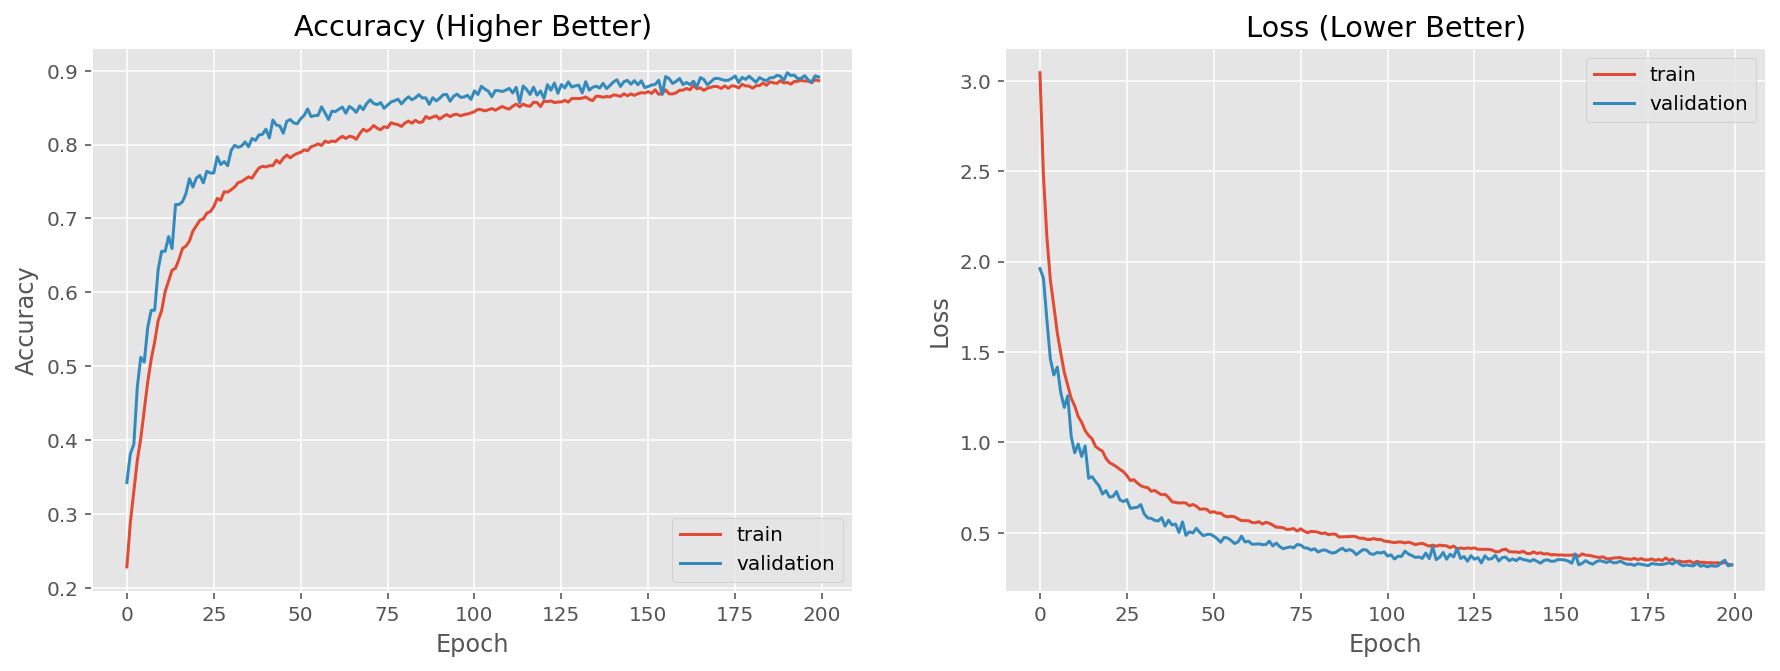

In [40]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['accuracy'])
ax1.plot(model_log.history['val_accuracy'])
ax1.set_title('Accuracy (Higher Better)')
ax1.set(xlabel='Epoch', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))

ax2.plot(model_log.history['loss'])
ax2.plot(model_log.history['val_loss'])
ax2.set_title('Loss (Lower Better)')
ax2.set(xlabel='Epoch', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

[0.3772783577442169, 0.8809000253677368]
Test loss: 0.3772783577442169
Test accuracy: 0.8809000253677368


In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Visualizing the wrongly classified data

In [29]:
# output = model.predict_classes(x_test)
# print (output)
# print(output.ndim)

In [30]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [31]:
# y_test.reshape(-1)

In [32]:
# ind = np.where(np.equal(output, y_test.reshape(-1))==0)

In [33]:
# ind

In [34]:
# err_x = x_test[ind[0]]
# err_y = output[ind[0]]
# print (err_x.shape)

In [35]:
# examples_per_class = 4
# classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# for cls, cls_name in enumerate(classes):
#   idxs = np.where(cls == err_y)
#   idxs = np.random.choice(idxs[0], examples_per_class, replace=False)
#   for i, idx in enumerate(idxs):
#     plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
#     plt.imshow(err_x[idx].astype('uint8'), cmap = 'gray')
#     plt.axis('off')
#     if i == 0:
#       plt.title(cls_name)